### https://zodiactrading.medium.com/top-10-quantitative-trading-strategies-with-python-82b1eff67650

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d')
dati

,Timestamp,Price
0,2014-09-17,355.957367
1,2014-09-18,328.539368
2,2014-09-19,307.761139
3,2014-09-20,318.758972
4,2014-09-21,310.632446
...,...,...
3503,2024-04-20,59876.710938
3504,2024-04-21,60956.074219
3505,2024-04-22,60919.242188
3506,2024-04-23,62729.296875


In [3]:
data_inizio = '2020-02-29'
data_fine = '2020-09-01'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
dati

,Timestamp,Price
0,2020-02-29,7798.025879
1,2020-03-01,7748.164551
2,2020-03-02,7959.358398
3,2020-03-03,7862.485352
4,2020-03-04,7861.055176
...,...,...
181,2020-08-28,9695.468750
182,2020-08-29,9664.351562
183,2020-08-30,9824.922852
184,2020-08-31,9785.023438


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_220072\1148311767.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1

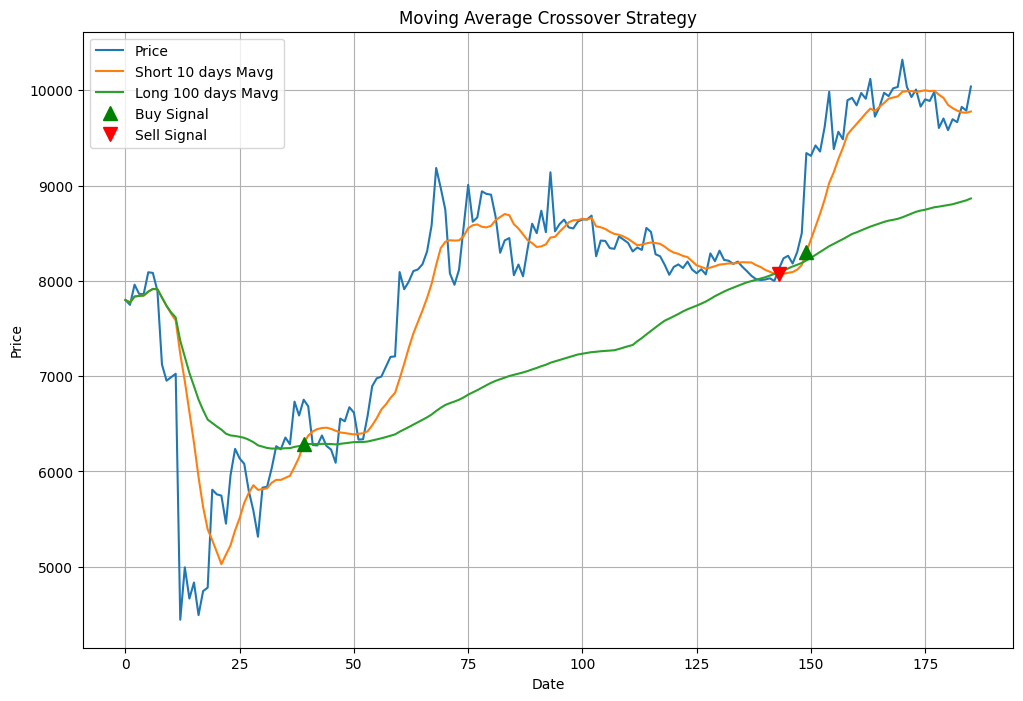

In [4]:
# Generate random price data for demonstration
# np.random.seed(42)
# price_data = np.random.randn(252) + 10  # 252 trading days
# date_index = pd.date_range(start='1/1/2023', periods=len(dati['Price']))
prices = dati['Price']

# Define a function to implement the moving average crossover strategy
def moving_average_crossover_strategy(prices, short_window, long_window):
    signals = pd.DataFrame(index=prices.index)
    signals['signal'] = 0.0

    # Create short simple moving average
    signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

# Define short and long windows for the moving averages
short_window = 10
long_window = 100

# Get signals from the moving average crossover strategy
signals = moving_average_crossover_strategy(prices, short_window, long_window)

# Plot the price data with buy and sell signals
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(prices.index, prices, label='Price')
ax.plot(signals.index, signals['short_mavg'], label=f'Short {short_window} days Mavg')
ax.plot(signals.index, signals['long_mavg'], label=f'Long {long_window} days Mavg')

# Plotting buy signals
ax.plot(signals.loc[signals.positions == 1.0].index,
        signals.short_mavg[signals.positions == 1.0],
        '^', markersize=10, color='g', label='Buy Signal')

# Plotting sell signals
ax.plot(signals.loc[signals.positions == -1.0].index,
        signals.short_mavg[signals.positions == -1.0],
        'v', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_220072\268742837.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.

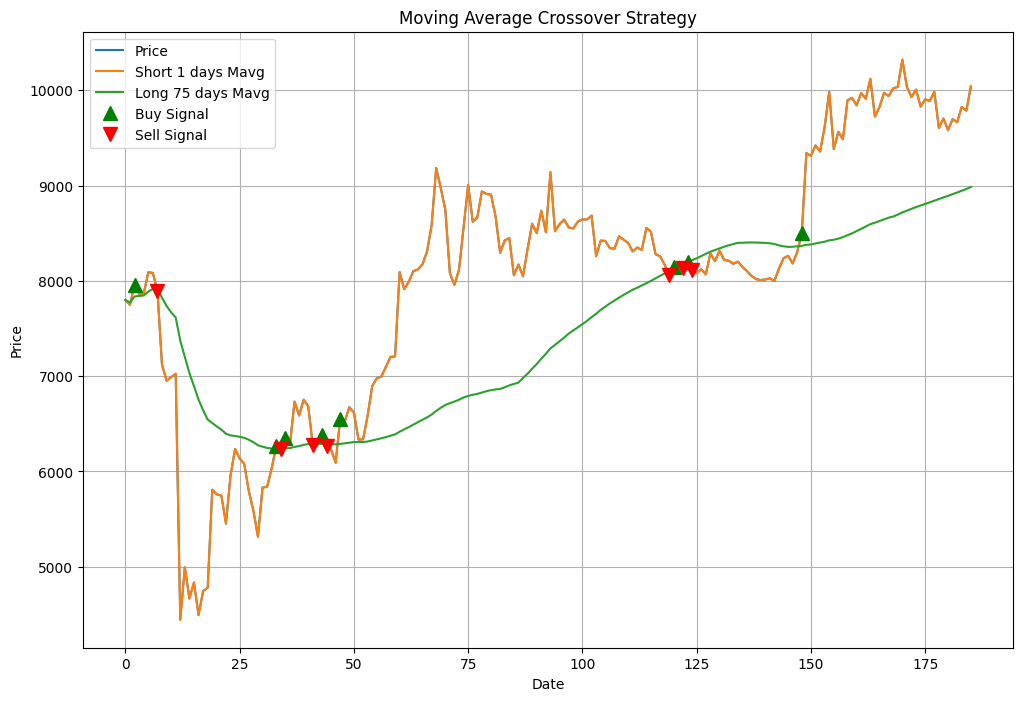

,Giorno,Azione,Liquidità_Operazione,BTC_Operazione,Liquidità_Posseduta,BTC_Posseduti,Valore_Totale_Portafoglio
0,1,Niente,0,0,1000,0,1000.000000
1,2,Acquisto,400.0,0.050255,600.0,0.050255,1000.000000
2,3,Niente,0,0,600.0,0.050255,995.131615
3,4,Niente,0,0,600.0,0.050255,995.059741
4,5,Niente,0,0,600.0,0.050255,1006.554686
...,...,...,...,...,...,...,...
180,181,Niente,0,0,16.79616,0.14009,1375.037400
181,182,Niente,0,0,16.79616,0.14009,1370.678184
182,183,Niente,0,0,16.79616,0.14009,1393.172666
183,184,Niente,0,0,16.79616,0.14009,1387.583144


In [18]:
prices = dati['Price']

# Define a function to implement the moving average crossover strategy
def moving_average_crossover_strategy(prices, short_window, long_window):
    signals = pd.DataFrame(index=prices.index)
    signals['signal'] = 0.0

    # Create short simple moving average
    signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

# Define short and long windows for the moving averages
short_window = 1
long_window = 75

# Get signals from the moving average crossover strategy
signals = moving_average_crossover_strategy(prices, short_window, long_window)

# Initialize variables
initial_cash = 1000  # Initial cash in USD
initial_btc = 0  # Initial amount of Bitcoin
cash = initial_cash
btc = initial_btc
perc_acquisto = 0.4
perc_vendita = 0

# DataFrame to store transaction history
columns = ['Giorno', 'Azione', 'Liquidità_Operazione', 'BTC_Operazione', 'Liquidità_Posseduta', 'BTC_Posseduti', 'Valore_Totale_Portafoglio']
tabella_transazioni = pd.DataFrame(columns=columns)

# Simulate trading
for i in range(1, len(prices)):
    day = prices.index[i]
    action = "Niente"
    cash_op = 0
    btc_op = 0

    if signals.positions[i] == 1.0:  # Buy signal
        action = "Acquisto"
        cash_op = cash * perc_acquisto
        btc_op = cash_op / prices[i]
        cash -= cash_op
        btc += btc_op
    elif signals.positions[i] == -1.0:  # Sell signal
        action = "Vendita"
        btc_op = btc * perc_vendita
        cash_op = btc_op * prices[i]
        cash += cash_op
        btc -= btc_op

    valore_totale_portafoglio = cash + btc * prices[i]

    # Record the transaction
    nuova_riga = pd.DataFrame([{
        'Giorno': day,
        'Azione': action,
        'Liquidità_Operazione': cash_op,
        'BTC_Operazione': btc_op,
        'Liquidità_Posseduta': cash,
        'BTC_Posseduti': btc,
        'Valore_Totale_Portafoglio': valore_totale_portafoglio
    }])
    
    tabella_transazioni = pd.concat([tabella_transazioni, nuova_riga], ignore_index=True)

# Plot the price data with buy and sell signals
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(prices.index, prices, label='Price')
ax.plot(signals.index, signals['short_mavg'], label=f'Short {short_window} days Mavg')
ax.plot(signals.index, signals['long_mavg'], label=f'Long {long_window} days Mavg')

# Plotting buy signals
ax.plot(signals.loc[signals.positions == 1.0].index,
        signals.short_mavg[signals.positions == 1.0],
        '^', markersize=10, color='g', label='Buy Signal')

# Plotting sell signals
ax.plot(signals.loc[signals.positions == -1.0].index,
        signals.short_mavg[signals.positions == -1.0],
        'v', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Display the transaction history
tabella_transazioni

In [19]:
tabella_transazioni[tabella_transazioni['Azione'] != 'Niente']

,Giorno,Azione,Liquidità_Operazione,BTC_Operazione,Liquidità_Posseduta,BTC_Posseduti,Valore_Totale_Portafoglio
1,2,Acquisto,400.0,0.050255,600.0,0.050255,1000.000000
6,7,Vendita,0.0,0.0,600.0,0.050255,996.732669
32,33,Acquisto,240.0,0.03831,360.0,0.088566,914.831021
33,34,Vendita,0.0,0.0,360.0,0.088566,911.951600
34,35,Acquisto,144.0,0.022656,216.0,0.111222,922.912677
40,41,Vendita,0.0,0.0,216.0,0.111222,914.205281
42,43,Acquisto,86.4,0.013548,129.6,0.12477,925.294821
43,44,Vendita,0.0,0.0,129.6,0.12477,911.583176
46,47,Acquisto,51.84,0.00791,77.76,0.132679,947.358431
118,119,Vendita,0.0,0.0,77.76,0.132679,1147.586995


#### Grid search

In [20]:
prices = prices = dati['Price']

# Define a function to implement the moving average crossover strategy
def moving_average_crossover_strategy(prices, short_window, long_window):
    signals = pd.DataFrame(index=prices.index)
    signals['signal'] = 0.0

    # Create short simple moving average
    signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

# Define parameter ranges for grid search
short_window_range = [1, 3, 5, 7, 9]
long_window_range = [50, 60, 70, 75, 100]
perc_acquisto_range = [0.1, 0.2, 0.4, 0.5]
perc_vendita_range = [0, 0.01, 0.05, 0.1]

# Initialize variables
initial_cash = 1000  # Initial cash in USD
initial_btc = 0  # Initial amount of Bitcoin

# Function to simulate trading and return the final portfolio value
def simulate_trading(prices, short_window, long_window, perc_acquisto, perc_vendita):
    signals = moving_average_crossover_strategy(prices, short_window, long_window)
    cash = initial_cash
    btc = initial_btc

    for i in range(1, len(prices)):
        if signals.positions[i] == 1.0:  # Buy signal
            cash_op = cash * perc_acquisto
            btc_op = cash_op / prices[i]
            cash -= cash_op
            btc += btc_op
        elif signals.positions[i] == -1.0:  # Sell signal
            btc_op = btc * perc_vendita
            cash_op = btc_op * prices[i]
            cash += cash_op
            btc -= btc_op

    valore_totale_portafoglio = cash + btc * prices.iloc[-1]
    return valore_totale_portafoglio

# Perform grid search
results = []
for short_window, long_window, perc_acquisto, perc_vendita in product(short_window_range, long_window_range, perc_acquisto_range, perc_vendita_range):
    final_value = simulate_trading(prices, short_window, long_window, perc_acquisto, perc_vendita)
    results.append((short_window, long_window, perc_acquisto, perc_vendita, final_value))

# Create a DataFrame with the results and sort by the final portfolio value
results_df = pd.DataFrame(results, columns=['Short_Window', 'Long_Window', 'Perc_Acquisto', 'Perc_Vendita', 'Valore_Totale_Portafoglio'])
results_df = results_df.sort_values(by='Valore_Totale_Portafoglio', ascending=False).reset_index(drop=True)

# Display the sorted results
results_df

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_220072\2094924285.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1

,Short_Window,Long_Window,Perc_Acquisto,Perc_Vendita,Valore_Totale_Portafoglio
0,1,75,0.4,0.00,1423.101647
1,1,50,0.4,0.00,1422.453150
2,1,60,0.4,0.00,1418.443260
3,1,100,0.4,0.00,1416.990185
4,1,75,0.4,0.01,1416.271423
...,...,...,...,...,...
395,9,60,0.1,0.10,1053.180420
396,9,50,0.1,0.10,1053.106688
397,9,70,0.1,0.10,1052.964561
398,9,75,0.1,0.10,1052.940897


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_220072\2094924285.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1

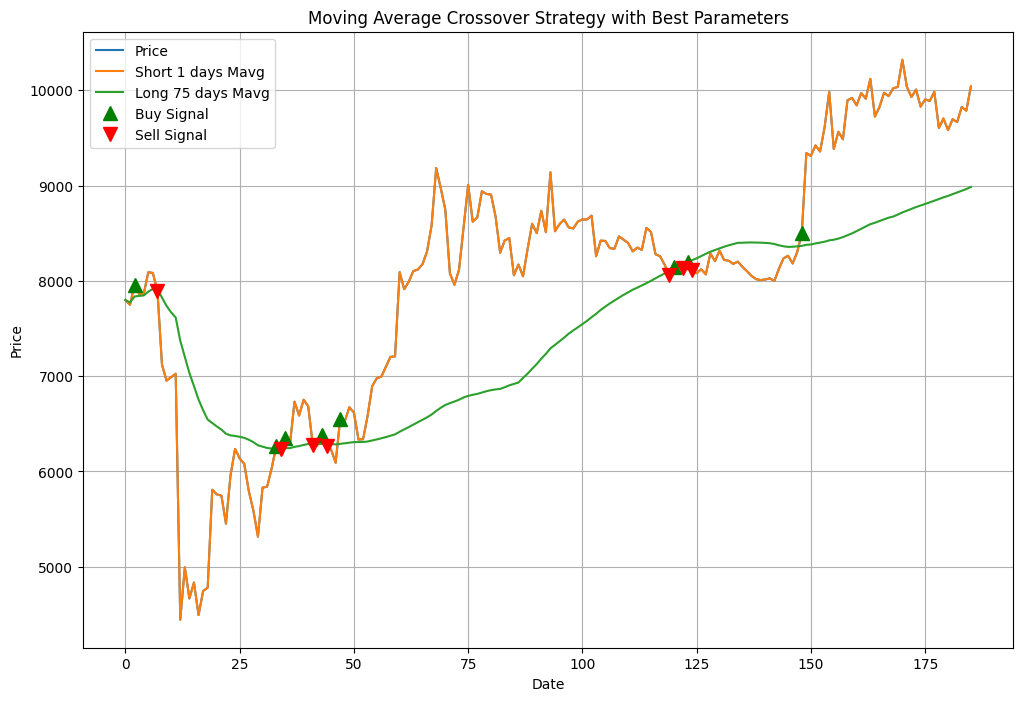

In [21]:
# Plot the best strategy
best_params = results_df.iloc[0]
best_signals = moving_average_crossover_strategy(prices, int(best_params['Short_Window']), int(best_params['Long_Window']))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(prices.index, prices, label='Price')
ax.plot(best_signals.index, best_signals['short_mavg'], label=f'Short {int(best_params["Short_Window"])} days Mavg')
ax.plot(best_signals.index, best_signals['long_mavg'], label=f'Long {int(best_params["Long_Window"])} days Mavg')

# Plotting buy signals
ax.plot(best_signals.loc[best_signals.positions == 1.0].index,
        best_signals.short_mavg[best_signals.positions == 1.0],
        '^', markersize=10, color='g', label='Buy Signal')

# Plotting sell signals
ax.plot(best_signals.loc[best_signals.positions == -1.0].index,
        best_signals.short_mavg[best_signals.positions == -1.0],
        'v', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Strategy with Best Parameters')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()